In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [24]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset has no null values, so no need to handle missing values

In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the result, we can see that our customers are in the range of 18-70 age wise, 15-137 k income wise and 1-99 score wise. This is essential information for further down the code.

In [29]:
# rename column
df = df.rename(columns={"Annual Income (k$)": "Income","Spending Score (1-100)": "Score"})
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Encode category
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

one_hot_map = {
    'Gender': {'Male': 0, 'Female': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

df_encoded.head()

,Gender,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


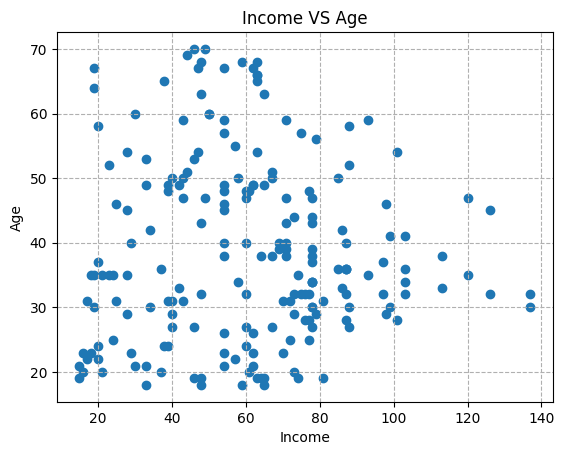

In [35]:
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

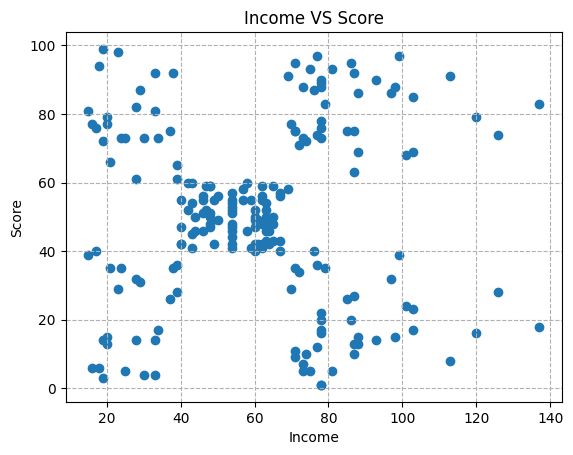

In [39]:
plt.scatter(df['Income'], df['Score'])
plt.title('Income VS Score')
plt.xlabel('Income')
plt.ylabel('Score')
plt.grid(axis='both', linestyle='--')
plt.show()

There are five customer segments from the scatter plot above.
1. Top-Right (High Income ($70k+) and High Spending Score (70-100).)
This is the ideal customer group. They have both the high purchasing power and the high willingness to spend. So should engage them with loyalty programs, premium offers, and personalized service to ensure retention.

2. Bottom-Right (High Income ($70k+) but Low Spending Score (0-40).)
These customers have money but are frugal or cautious. They are not easily impressed and don't spend impulsively. So Target them with promotions that emphasize value, quality, durability, or investment.

3. Center (Average Income ($40k-$70k) and Average Spending Score (40-60).)
This is the largest and most dense cluster, representing the "average" customer. They are predictable and form the core of the customer base. So this group is receptive to general, mass-market campaigns, seasonal sales, and standard promotions.

4. Top-Left (Low Income ($15k-$40k) but High Spending Score (60-100).)
This group spends a lot despite not earning much. They are likely younger, trend-driven, and may be spending on credit.So target them with trendy, high-volume, lower-cost items. Social media marketing and "buy now, pay later" options would be effective. They may not be loyal, but they are active spenders.

5. Bottom-Left (Low Income ($15k-$40k) and Low Spending Score (0-40).)
This group is highly budget-conscious. They don't earn much and are very careful with their spending. So target them with essentials, deep discounts, and clearance sales. Don't waste high-cost marketing efforts on this group.

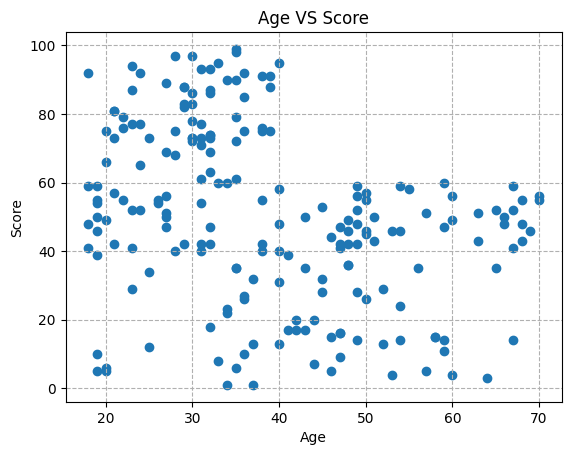

In [38]:
plt.scatter(df['Age'], df['Score'])
plt.title('Age VS Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.grid(axis='both', linestyle='--')
plt.show()

There are 2 Observations.
1. High Spenders are Overwhelmingly Young (Under 40)
The densest cluster of high spending scores (roughly 60 to 100) is almost entirely among customers in the 20-40 age range. This strongly suggests that the most active and high-value spenders are younger. This demographic is likely more trend-driven, impulsive, and engaged with the mall's offerings.So marketing campaigns, new product launches, and trend-based advertising should be heavily targeted at this under-40 demographic to maximize sales.

2. Spending Scores Drop and Consolidate After Age 40
As age increases past 40, high spending scores (above 60) become extremely rare. Instead, customers aged 40-70 are almost all in the low-to-moderate spending range (0-60). This is a clear shift in spending habits as customers get older. Their priorities likely change, making them more cautious and moderate spenders. So target them with promotions emphasizing value, quality, or necessity rather than trendy, high-cost items.


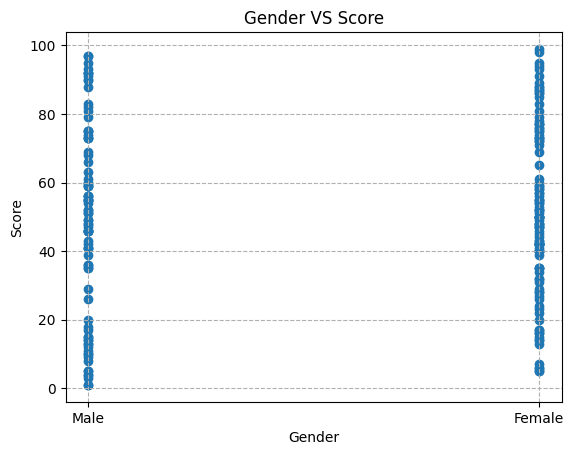

In [40]:
plt.scatter(df['Gender'], df['Score'])
plt.title('Gender VS Score')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.grid(axis='both', linestyle='--')
plt.show()

2 insights from the scatter plot.
1. Females Show a Slightly Higher Spending Tendency
he "Female" column appears to be slightly more concentrated in the average-to-high spending scores (roughly 40-100). In contrast, the "Male" column seems to have a slightly stronger concentration in the low-to-average spending scores (roughly 0-60). This suggests that while the difference isn't massive, the average spending score for females in this dataset is likely slightly higher than for males.

2. Gender Alone is Not a Good Predictor
Both "Male" and "Female" columns span the entire range of scores, from 0 all the way to 100. This means using gender as the only criteria for a marketing campaign would be very inefficient.

In [ ]:
# create new dataframe that consist only annual income and spending score
df = df[['Score', 'Income']]
df.head()

,Score,Income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


I use score and income because "Income VS Score" plot shows 5 clear, dense, and well-separated clusters. The algorithm will have no trouble identifying these five groups.

# Data Scaling (Choose One)

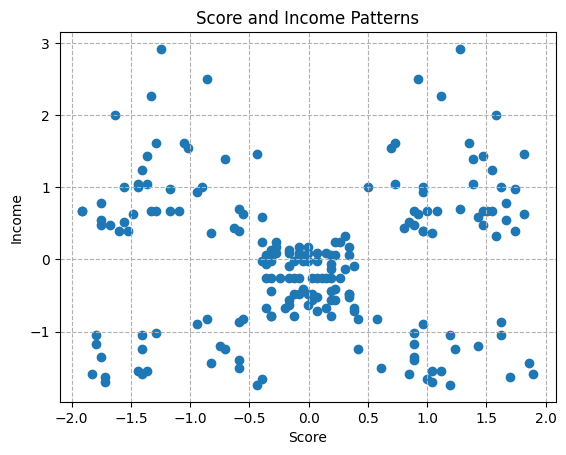

In [44]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Score", "Income"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Score"], df_sc_scaled["Income"])
plt.xlabel("Score")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Score and Income Patterns")
plt.show()

Scaling is essential for distance-based methods like K-Means because the features, Annual Income (15-137) and Spending Score (1-100), are on different numerical scales. Scaling transforms both features to a common range, ensuring they are treated with equal importance and allowing the algorithm to find the true, balanced segments in your data.

# K-Means Clustering

In [45]:
from sklearn.cluster import KMeans

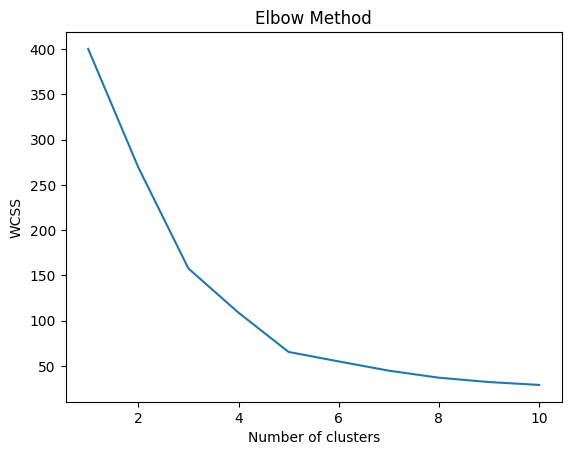

In [46]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  400.000000
1                   2  269.299343
2                   3  157.704008
3                   4  108.921317
4                   5   65.568408
5                   6   55.114226
6                   7   44.911186
7                   8   37.148117
8                   9   32.345838
9                  10   29.178990


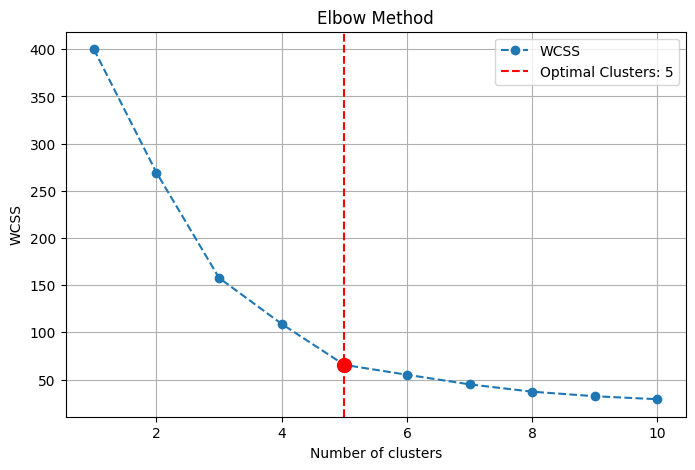

The optimal number of clusters is: 5


In [48]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

After using the code to find K / optimal number of clusters, the result is that 5 is the most optimal number of cluster for Income x Score.

In [49]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Score,Income,KMeans_Cluster
0,39,15,3
1,81,15,4
2,6,16,3
3,77,16,4
4,40,17,3


C:\Users\amand\AppData\Local\Temp\ipykernel_23720\1570986954.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Score", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


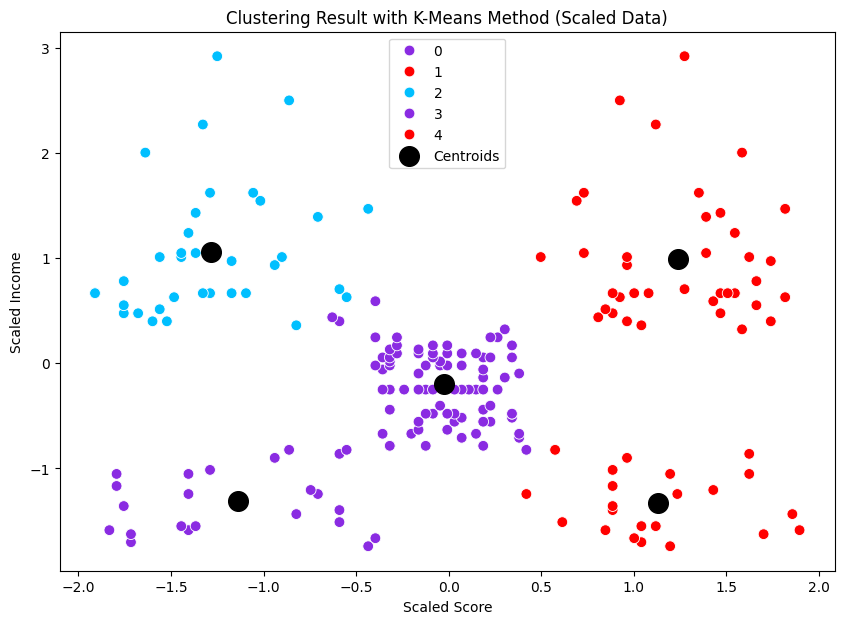

In [51]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Score", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Score")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

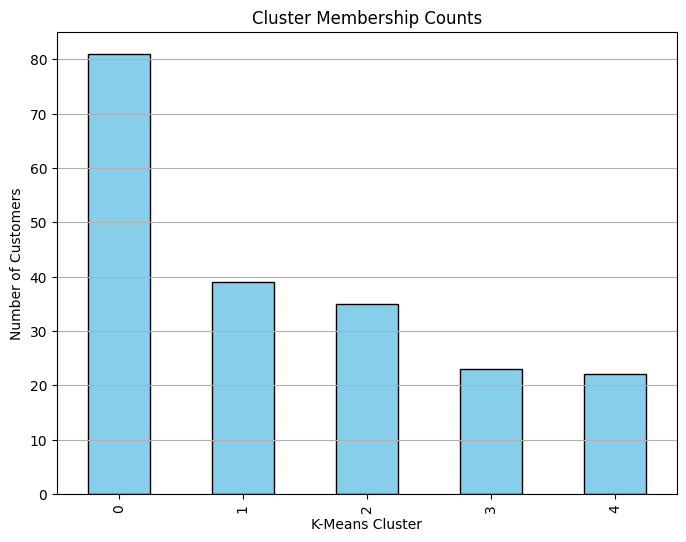

In [52]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


Income and Score Version 

In [54]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Score': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Score             Income         
                     mean min max       mean min  max
KMeans_cluster                                       
0               49.518519  34  61  55.296296  39   76
1               82.128205  63  97  86.538462  69  137
2               17.114286   1  39  88.200000  70  137
3               20.913043   3  40  26.304348  15   39
4               79.363636  61  99  25.727273  15   39

# Managerial Implications Based on the Five Clusters
**Cluster 0 = "Standard Customers"**

Profile:
* Income: Average (Mean ~$55k, Range $39k-$76k)
* Score: Average (Mean ~50, Range 34-61)
* This is the "average," predictable core of the customer base.

Implications:
* Targeting: Mass-market campaigns and seasonal promotions.
* Pricing: Standard pricing, "buy one, get one" offers, and bundle deals.
* Channels: Broad channels like email marketing, in-store displays, and general social media.
* Retention: Focus on standard loyalty programs to encourage repeat visits.

**Cluster 1 = "The VIPs" (Target Customers)**

Profile:
* Income: High (Mean ~$87k, Range $69k-$137k)
* Score: Very High (Mean ~82, Range 63-97)
* The ideal customers. They have high purchasing power and a high willingness to spend.

Implications:
* Targeting: Target with premium products, new arrivals, and exclusive services.
* Pricing: Less price-sensitive. Focus on quality and status over discounts.
* Channels: Personalized email, VIP event invitations, and targeted premium ads.
* Retention: High-priority for retention. Offer exclusive perks, personalized service, and early access to sales.

**Cluster 2 = "The Careful Wealthy"**

Profile:
* Income: High (Mean ~$88k, Range $70k-$137k)
* Score: Very Low (Mean ~17, Range 1-39)
* They have high purchasing power but are extremely frugal and cautious spenders.

Implications:
* Targeting: Target with products emphasizing value, quality, durability, or long-term investment.
* Pricing: Justify high price points with high quality.
* Channels: Use informative channels rather than flashy ads.
* Retention: Hard to convert, but may become loyal if they trust the quality and value proposition.

**Cluster 3 = "Budget-Conscious Savers"**

Profile:
* Income: Low (Mean ~$26k, Range $15k-$39k)
* Score: Very Low (Mean ~21, Range 3-40)
* Highly price-sensitive with low purchasing power and low spending habits.

Implications:
* Targeting: Target only with essential items, deep discounts, and clearance sales.
* Pricing: Pricing is the single most important factor.
* Channels: Low-cost channels like in-store signage, flyers, or app notifications for "final sale" events.
* Retention: Not a high-priority retention group; focus on maximizing volume per visit.

**Cluster 4 = "The Impulsive Spenders"**

Profile:
* Income: Low (Mean ~$26k, Range $15k-$39k)
* Score: Very High (Mean ~79, Range 61-99)
* They spend a lot despite not earning much. Likely trend-driven, impulsive, and may be spending on credit.

Implications:
* Targeting: Target with trendy, fast-fashion, or low-cost, high-volume items.
* Pricing: Offer "Buy Now, Pay Later" (BNPL) options to reduce purchase friction.
* Channels: Use high-engagement social media like TikTok and Instagram; influencer marketing is ideal.
* Retention: Loyalty may be low (they follow trends), so focus on capturing their impulse buys with an easy checkout experience.

All columns version

In [67]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df_full = pd.read_csv(url)

df_full['KMeans_Cluster'] = clusters

df_full = df_full.rename(columns={
    "Annual Income (k$)": "Income",
    "Spending Score (1-100)": "Score"
})

df_full = df_full.drop(columns=['CustomerID'])

df_encoded = df_full.copy()
one_hot_map = {
    'Gender': {'Male': 0, 'Female': 1}
}
for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

print("Encoded DataFrame Head:")
print(df_encoded.head())
print("\n" + "="*30 + "\n")

cluster_summary = df_full.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Income': ['mean', 'median', 'min', 'max'], 
    'Score': ['mean', 'median', 'min', 'max'],  
    'Gender': lambda x: x.mode().iloc[0] 
})

print("Cluster Summary Report:")
print(cluster_summary)

Encoded DataFrame Head:
   Gender  Age  Income  Score  KMeans_Cluster
0       0   19      15     39               3
1       0   21      15     81               4
2       1   20      16      6               3
3       1   23      16     77               4
4       1   31      17     40               3


Cluster Summary Report:
                      Age                    Income                  \
                     mean median min max       mean median min  max   
KMeans_Cluster                                                        
0               42.716049   46.0  18  70  55.296296   54.0  39   76   
1               32.692308   32.0  27  40  86.538462   79.0  69  137   
2               41.114286   42.0  19  59  88.200000   85.0  70  137   
3               45.217391   46.0  19  67  26.304348   25.0  15   39   
4               25.272727   23.5  18  35  25.727273   24.5  15   39   

                    Score                  Gender  
                     mean median min max <lambda>  
K

# Managerial Implications Based on the Five Clusters
**Cluster 0 = "Standard Customers"**

Profile:
* Age: Middle-aged (Mean ~43, Median 46).
* Income: Average (Mean ~$55k).
* Score: Average (Mean ~50).
* Gender: Predominantly Female.

Implications:
* Targeting: Mass-market campaigns and seasonal promotions.
* Pricing: Standard pricing, "buy one, get one" offers, and bundle deals.
* Channels: Broad channels like email marketing, in-store displays, and general social media.
* Retention: Focus on standard loyalty programs to encourage repeat visits.

**Cluster 1 = "The VIPs" (Target Customers)**

Profile:
* Age: Younger (Mean ~33, Range 27-40).
* Income: High (Mean ~$87k).
* Score: Very High (Mean ~82).
* Gender: Predominantly Female.

Implications:
* Targeting: Target with premium products, new arrivals, and exclusive services.
* Pricing: Less price-sensitive. Focus on quality and status over discounts.
* Channels: Personalized email, VIP event invitations, and targeted premium ads.
* Retention: High-priority for retention. Offer exclusive perks, personalized service, and early access to sales.

**Cluster 2 = "The Careful Wealthy"**

Profile:
* Age: Middle-aged (Mean ~41).
* Income: High (Mean ~$88k).
* Score: Very Low (Mean ~17).
* Gender: Predominantly Male.
* They have high purchasing power but are extremely frugal and cautious spenders.

Implications:
* Targeting: Target with products emphasizing value, quality, durability, or long-term investment.
* Pricing: Justify high price points with high quality.
* Channels: Use informative channels rather than flashy ads.
* Retention: Hard to convert, but may become loyal if they trust the quality and value proposition.

**Cluster 3 = "Budget-Conscious Savers"**

Profile:
* Age: Older (Mean ~45, Median 46).
* Income: Low (Mean ~$26k).
* Score: Very Low (Mean ~21).
* Gender: Predominantly Female.
* Highly price-sensitive with low purchasing power and low spending habits.

Implications:
* Targeting: Target only with essential items, deep discounts, and clearance sales.
* Pricing: Pricing is the single most important factor.
* Channels: Low-cost channels like in-store signage, flyers, or app notifications for "final sale" events.
* Retention: Not a high-priority retention group; focus on maximizing volume per visit.

**Cluster 4 = "The Impulsive Spenders"**

Profile:
* Age: Very Young (Mean ~25, Median 23.5).
* Income: Low (Mean ~$26k).
* Score: Very High (Mean ~79).
* Gender: Predominantly Female.
* They spend a lot despite not earning much. Likely trend-driven, impulsive, and may be spending on credit.

Implications:
* Targeting: Target with trendy, fast-fashion, or low-cost, high-volume items.
* Pricing: Offer "Buy Now, Pay Later" (BNPL) options to reduce purchase friction.
* Channels: Use high-engagement social media like TikTok and Instagram; influencer marketing is ideal.
* Retention: Loyalty may be low (they follow trends), so focus on capturing their impulse buys with an easy checkout experience.